In [124]:
import psopy
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import ACOframework as af
import random

problem = tsplib95.load_problem('dsj1000.tsp', special=euclidean_2d_jitter)
# print(list(problem.get_nodes()))

In [125]:
import random
import math
def euclidean_2d_jitter(a, b):
    x1, y1 = a
    x2, y2 = b
    dist = math.sqrt((x2 - x1) ** 2 + ((y2 - y1) ** 2))
    return (dist * random.random() * 2)

In [126]:
print((list(problem.get_edges())))
print(len(list(problem.get_nodes())))
print(list(problem.edge_weight_type))
print(problem.wfunc(3, 4))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [118]:
graph = problem.get_graph()

C:\Users\frank\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


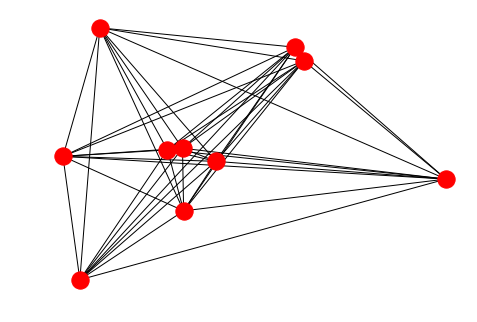

In [119]:
nx.draw(graph)

## Ant Colony Optimization

In [120]:
class TSPInstance():
    def __init__(self, problem):
        self.problem = problem
        self.n = len(list(self.problem.get_nodes()))

    def getNumVertices(self):
        return self.n

    def getWeight(self, u, v):
        return self.problem.wfunc(u + 1, v + 1)

In [121]:
class TSPAnt(af.ACS_Ant):
    def __init__(self, instance, **kwargs):
        self.instance = instance

        super().__init__(**kwargs)

    def getComponentCost(self, component):
        #print(*component)
        return self.instance.getWeight(*component)

    def constructSolution(self):
        # set of all vertices
        V = set(range(self.instance.getNumVertices()))

        # initial vertex - last added vertex
        u = 0

        # vertices in the solution
        U = set([u])

        while U != V:
            # the available components at the current iteration
            # are (u, v) where u is the last added vertex
            # and v is a vertex that has not been added
            components = [(u, v) for v in V - U]

            # select a component and update u
            _, u = self.makeDecision(components)

            U.add(u)

        # add last edge
        self.makeDecision([(u, 0)])

In [127]:
#print(problem.wfunc(1,2))
instance = TSPInstance(problem)
obj, components = af.Solve(antCls = TSPAnt, instance = instance, numIterations = 1000, numAnts = 10, alpha = 1, beta = 1) 

KeyboardInterrupt: 

In [123]:
print(obj)
print()
print(components)

3078332

[(5, 4), (1, 3), (6, 9), (4, 6), (7, 0), (2, 1), (3, 8), (8, 5), (0, 2), (9, 7)]


AttributeError: 'TSPInstance' object has no attribute 'xcoord'

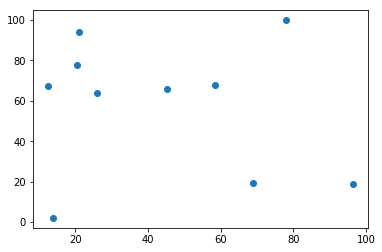

In [33]:
plt.scatter(instance.xcoord, instance.ycoord)

In [34]:
for path in components:
    print(path)
    print(instance.xcoord[path[0]])
    print(instance.ycoord[path[0]])
    

(2, 7)
20.4990984494652
77.6979351186178
(7, 3)
20.895332869179573
94.05747276175622
(5, 1)
13.886328605121145
2.08345190899627
(8, 2)
12.537149247191659
67.45187276244928
(4, 6)
58.296566189658805
67.94664384547772
(6, 0)
77.85439818545433
99.80370304307293
(1, 8)
25.915473859323836
63.94238276395865
(0, 9)
96.2712706580345
18.601705113545396
(9, 5)
68.74774594327641
19.39342782170722
(3, 4)
45.28177732590134
65.61348770178111


Graph has 5 nodes with 5 edges


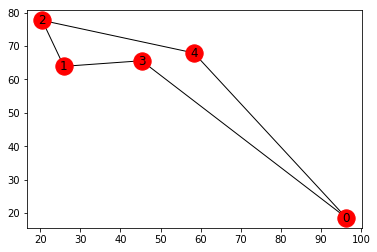

In [35]:
G=nx.Graph(name="buba")
routes = [[0,1,2,3,4]]
edges = [(1, 3), (3, 0), (2, 1), (0, 4), (4, 2)]
for r in routes:
     G.add_nodes_from(r)
G.add_edges_from(edges)

print("Graph has %d nodes with %d edges" %(G.number_of_nodes(),    
G.number_of_edges()))
nx.draw_networkx(G,with_labels=True, pos=pos)
plt.savefig('this.png')
plt.show()